# MNIST Handwritten Digit Classifier - Identify Number from Cropped Image

Given a dataset of 6,000 images of handwritten digits that have beeen cropped in half in the middle, train a neural network to identify the number.

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Crop the images to 14x14 pixels in the middle.

In [4]:
X_train = X_train[:, 7:21, 7:21]
X_test = X_test[:, 7:21, 7:21]

Show some example digits.

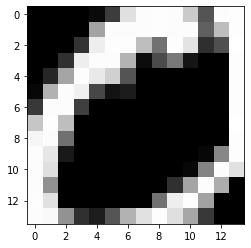

In [5]:
plt.imshow(X_train[1], cmap='gray')

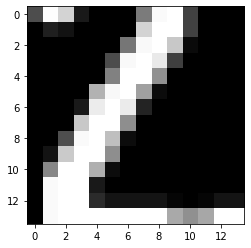

In [6]:
plt.imshow(X_test[1], cmap='gray')

Prepare features and target for training.

In [7]:
image_height,image_width = 14, 14

X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 196)
(10000, 196)


In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Train a neural network with 2 hidden layers of 64 nodes each.

In [9]:
model = Sequential()

In [10]:
model.add(Dense(16, activation='relu', input_shape=(196,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3152      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 3,594
Trainable params: 3,594
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1359 - accuracy: 0.7758 - val_loss: 0.0743 - val_accuracy: 0.8877
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0699 - accuracy: 0.8928 - val_loss: 0.0611 - val_accuracy: 0.9036
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9077 - val_loss: 0.0545 - val_accuracy: 0.9122
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9169 - val_loss: 0.0503 - val_accuracy: 0.9191
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0499 - accuracy: 0.9231 - val_loss: 0.0483 - val_accuracy: 0.9217
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9274 - val_loss: 0.0461 - val_accuracy: 0.9275
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0459 - accuracy: 0.9301 - val_loss: 0.0459 - val_accuracy:

Evaluate the model performance.

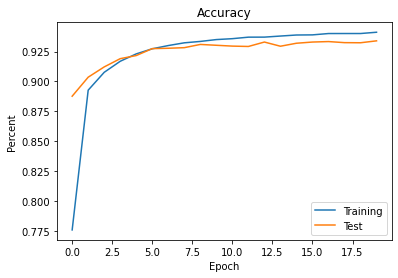

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Test'])

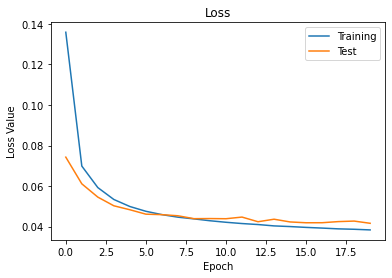

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Test'])

In [16]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9340


[0.04163707047700882, 0.9340000152587891]